In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cleanedsurvey/df.csv


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import (mean_absolute_error,mean_squared_error,r2_score)

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
import joblib

In [3]:
df=pd.read_csv('/kaggle/input/cleanedsurvey/df.csv')
print(df.shape)
print(df.describe())
df.info()

(1243, 30)
               Age  self_employed  family_history    treatment  \
count  1243.000000     1243.00000     1243.000000  1243.000000   
mean     32.123894        0.11424        0.391794     0.505229   
std       7.145538        0.31823        0.488348     0.500174   
min      19.000000        0.00000        0.000000     0.000000   
25%      27.000000        0.00000        0.000000     0.000000   
50%      31.000000        0.00000        0.000000     1.000000   
75%      36.000000        0.00000        1.000000     1.000000   
max      65.000000        1.00000        1.000000     1.000000   

       work_interfere  no_employees  remote_work  tech_company     benefits  \
count     1243.000000    800.000000  1243.000000   1243.000000  1243.000000   
mean         0.582060    493.772500     0.294449      0.819791     0.541030   
std          0.329391    411.750299     0.455978      0.384516     0.409142   
min          0.000000     63.000000     0.000000      0.000000     0.000000   

In [4]:
map={'Male':0,'Female':1,'Others':0.5}
df['Gender']=df['Gender'].map(map)

In [5]:
num_cols=['family_history','remote_work','Gender','tech_company','obs_consequence','work_interfere',
         'supervisor','coworkers','benefits','wellness_program','seek_help','anonymity',
          'mental_vs_physical','care_options','mental_health_consequence','phys_health_consequence',
         'mental_health_interview','phys_health_interview']
target='Age'
df_clean = df[num_cols + [target]].copy()
X = df_clean[num_cols]
y = df_clean['Age']

In [6]:
lr=LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("MAE: ", mean_absolute_error(y_test, y_pred_lr))
print("MSE: ", mean_squared_error(y_test, y_pred_lr))
print("R² Score: ", r2_score(y_test, y_pred_lr))

MAE:  5.275630275243519
MSE:  46.94422439272615
R² Score:  0.06391345988204022


In [8]:
rfr=RandomForestRegressor(random_state=42,n_estimators=200,max_depth=10)
rfr.fit(X_train, y_train)

y_pred_rfr = rfr.predict(X_test)
print("MAE: ", mean_absolute_error(y_test, y_pred_rfr))
print("MSE: ", mean_squared_error(y_test, y_pred_rfr))
print("R² Score: ", r2_score(y_test, y_pred_rfr))

MAE:  5.347410072569394
MSE:  47.80342646256779
R² Score:  0.046780628245676636


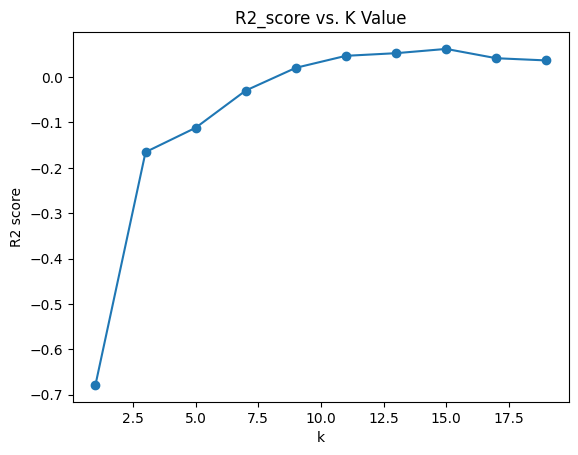

In [9]:
k_values = list(range(1, 21,2))
r2scores= []
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

for k in k_values:
    knnr = KNeighborsRegressor(n_neighbors=k)
    knnr.fit(X_train, y_train)
    r2=r2_score(y_test, knnr.predict(X_test))
    r2scores.append(r2)

plt.plot(k_values, r2scores, marker='o')
plt.title("R2_score vs. K Value")
plt.xlabel("k")
plt.ylabel("R2 score")
plt.show()

In [10]:
knnr = KNeighborsRegressor(n_neighbors=15)
knnr.fit(X_train, y_train)

y_pred_knnr = knnr.predict(X_test)
print("MAE: ", mean_absolute_error(y_test, y_pred_knnr))
print("MSE: ", mean_squared_error(y_test, y_pred_knnr))
print("R² Score: ", r2_score(y_test, y_pred_knnr))

MAE:  5.239892904953146
MSE:  47.03198572066042
R² Score:  0.062163464033032634


In [11]:
scores=pd.Series([r2_score(y_test, y_pred_lr),r2_score(y_test, y_pred_rfr),r2_score(y_test, y_pred_knnr)],
                index=['LR','RF','KNN'])
print('results=')
print(scores)

results=
LR     0.063913
RF     0.046781
KNN    0.062163
dtype: float64


In [12]:
joblib.dump(lr, "regression_model.pkl")

['regression_model.pkl']